# Density Matrices & Mixed States
**Remark:** $\hbar = 1 $ for convenience.

When open systems are studied, it's usually impossible to describe the entire system. We would usually limit ourselves with studying the properties of subsystem instead. That's why density matrices formalism is used.
Suppose a quantum system is in a state $\ket{\psi_i}$ with probability $p_i$, then we define the *density matrix* to be 
$\rho = \sum_{i}p_i\ket{\psi_i}\bra{\psi_i}$ associated with ensemble $\{p_i\ket{\psi_i}\}$. This  notation introduces classical uncertainty over quantum states, not superposition. The density matrices encode all experimetally accessible  imformation about the system.
Density matrices are positive operators $\braket{\psi|\rho|\psi} \geq 0$ for all $\ket{\psi}$ and hence in complex hilbert spaces it is Hermitian. Density matrices also have trace 1, $tr(\rho) =1$ (normalisation). Density matrices are hence orthogonaly diagonisable and normalised.

This definition allows us to reformulate the quantum mechanics enitirely in terms of density matrices. The most importantly it allows us to work with systems that we do not know fully or subsystems.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, basis, ket2dm, expect, sesolve, qeye, sigmax, sigmay, sigmaz, Bloch)

System whoose state $\ket{\psi}$ is known is said to be in pure state and $tr(\rho^2) = 1$. Otherwise, $\rho$ is said to be a mixed state, with $tr(\rho^2) < 1$ Mathematically pure states can be interpreted as density matrix being one dimensional projector ($\rho^2 = \rho$). 

We can numerically compare single qubit pure and mixed systems:

In [2]:
N = 2 #Dimensions of Hilbert space
ket0 = basis(N,0)
ket1 = basis(N, 1)
a = 0.3
b = 0.7
rho1 = ket2dm(ket0) #Define a pure state
rho2 = a*ket2dm(ket0) + b*ket2dm(ket1) #Define a mixed state
purity1 = (rho1*rho1).tr()
purity2 = (rho2*rho2).tr()
print("Purity of first state is ", purity1)
print("Purity of second state is ", purity2)

Purity of first state is  1.0
Purity of second state is  0.58


## Measurements
We can also describe measurements in terms of density matrices. Suppose system is initially in a state $\ket{\psi_i}$ with probability $p_i$. If we perform measurement M with eigenvalues $m$ and eigenstate projectors $P_m$, then the probability of getting m is $p(m|i) = \braket{\psi_i|P_m|\psi_i} = tr(P_m\ket{\psi_i}\bra{\psi_i})$, then simple probability theory gives $p(m) = \sum_{i}p(m|i)\cdotp(i) = \sum_{i}p_i\cdot tr(P_m\ket{\psi_i}\bra{\psi_i}) = tr(P_m\rho)$. And hence the expectation is  $\langle M \rangle = \sum_{m}m\cdot p_m = tr(M\rho)$. This expression generalises measurements for mixed states and reduces to $\braket{\psi|A|\psi}$ for pure states.

We can know compute the expectation valies of spin of a mixed state upon x,y and z axes:


In [3]:
sz = 0.5*sigmaz()
sx = 0.5*sigmax()
sy = 0.5*sigmay()
print("Expectation on z-axis", expect(sz, rho2))
print("Expectation on x-axis", expect(sx, rho2))
print("Expectation on y-axis", expect(sy, rho2))

Expectation on z-axis -0.19999999999999998
Expectation on x-axis 0.0
Expectation on y-axis 0.0


We obtain classical probability on z-axis. That is, because the density matrix is diagonal in $\sigma_z$ basis. But expectation on x and y is 0, which means that probability of obtaining either of eigenstates is 0.5. This is known as decoherence. The state is no longer in quantum superposition and density matrix formalism allows us to descibe it. It turns out that the off-diagonal elements of matrix with respect to some basis, represent the relative phases of interference. So when density matrix becomes diagonal with respect to some basis, it loses the superposition properties and we obtain classical (commutative) probability on it.

## Bloch sphere and geometric representation of mixed states
We can generalise Bloch sphere, that was defined for pure states for mixed states. Density matrix can be represented as $\rho = \frac{I + \vec{r}\cdot \vec{\sigma}}{2}$, since $\{I, \sigma_x, \sigma_y, \sigma_z\}$ forms a basis for 2x2 Hermitian matrices. Where vector $\vec{r}$ is called Bloch vector, and it geometrically represents the quantum state on Bloch sphere. Bloch  vector is bounded by 1 $\|r\| \leq 1$,with $\|r\| = 1$ for pure states and $\|r\|<1$ for mixed states. The maximally mixed state has $\|r\| = 0$ and is located at the origin of Bloch sphere. We can also use Hilbert-Schmidt inner product to obtain that $\vec{r} = (\langle \sigma_x \rangle, \langle \sigma_y \rangle, \langle \sigma_z \rangle)$.

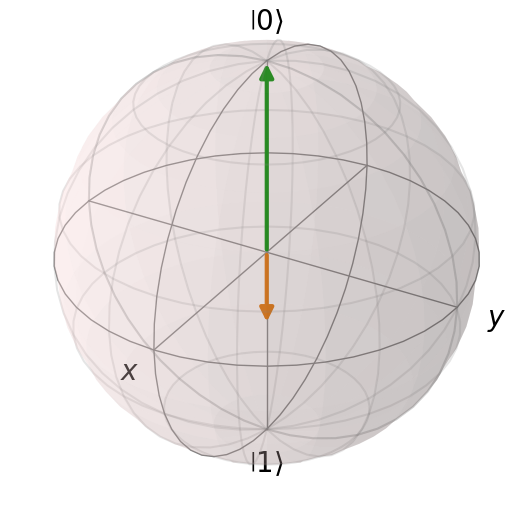

Bloch vector of rho1:  [0.0, 0.0, 0.5]
Bloch vector of rho2:  [0.0, 0.0, -0.19999999999999998]


In [4]:
b = Bloch()
r1 = [expect(sx, rho1), expect(sy, rho1), expect(sz, rho1)]
r2 = [expect(sx, rho2), expect(sy, rho2), expect(sz, rho2)]
b.add_states(rho1)
b.add_states(rho2)
b.show()
print("Bloch vector of rho1: ", r1)
print("Bloch vector of rho2: ", r2)

## Conclusion
Density matrices formalism allows us to describe quantum states that can be described by state vectors. But what is more important, it allows to describe systems that are not fully known, that can't be simply described by state vectors. Density vectors introduce classical statistics to be used with quantum probability. It also quantifies the phenomena of decoherence. 
However, the main application of density matrices is description of subsystems of larger systems. Giving rise for description of open quantum systems and entangled states. It turns out, that when we can't describe full  open system, we can always divide it to subsystems - closed system and environment. Then we can just look at closed subsystem using reduced density matrices. This gives a perfect tool for  describing noise in quantum chanels.

## References
[1] Preskill, J. (2015). Physics 219/Computer Science 219, Quantum Computation Chapter 2. Foundations I: States and Ensembles.

[2] Slofstra W. (2022). Linear algebra and quantum probability.

[3] Nielsen, M.A., & Chuang, I.L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.